In [168]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [169]:


datas_folder = "Datas"
data_path = os.path.join(datas_folder, "GlobalTemperatures.csv")
veri_df = pd.read_csv(data_path)


In [170]:
veri_df = veri_df.dropna(subset=["LandAverageTemperatureUncertainty"])
veri_df["LandAverageTemperatureUncertainty"].fillna(veri_df["LandAverageTemperatureUncertainty"].mean(), inplace=True)

In [171]:
veri_df.shape

(3180, 9)

In [172]:
veri_df.head(20)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
veri_df.LandAverageTemperature.describe()

count    3180.000000
mean        8.374731
std         4.381310
min        -2.080000
25%         4.312000
50%         8.610500
75%        12.548250
max        19.021000
Name: LandAverageTemperature, dtype: float64

In [174]:
# Haritayı oluştur
fig = px.scatter_3d(veri_df, 
                    x="dt", 
                    y="LandAverageTemperature", 
                    z="LandAndOceanAverageTemperature",
                    color="LandAndOceanAverageTemperature",
                    hover_name="dt",
                    color_continuous_scale="Viridis",  # Renk skalası
                    title="Dünya Sıcaklık Değişimleri - 3D Harita",
                    template="plotly_dark"  # Temayı değiştirme
)

# Harita görselleştirmelerini özelleştir
fig.update_layout(
    scene=dict(xaxis_title='Tarih', yaxis_title='Ortalama Sıcaklık', zaxis_title='Ortalama Sıcaklık (Kara ve Deniz)'),
    margin=dict(l=0, r=0, b=0, t=40),
    coloraxis_colorbar=dict(title="Ortalama Sıcaklık"),
    paper_bgcolor='black',  # Arka plan rengini siyah yapma
    scene_bgcolor='black',  # 3D sahne arka plan rengini siyah yapma
)

# Markerları özelleştirme
fig.update_traces(marker=dict(size=5, symbol='circle', opacity=0.8))

# Haritayı göster
fig.show()


In [175]:


# Load the sea level data

datas_folder = "Datas"
sealevel_data_path = f"{datas_folder}/sealevel.csv"
sealevel_df = pd.read_csv(sealevel_data_path)

In [176]:

# Convert Date to datetime format
sealevel_df['Year'] = pd.to_datetime(sealevel_df['Year'], format='%Y')


In [177]:
average_sea_level_by_year = sealevel_df.groupby('Year')['TotalWeightedObservations'].mean()


In [178]:
sealevel_df.shape

(1048, 9)

In [179]:
sealevel_df.head(35)

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993-01-01,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993-01-01,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993-01-01,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993-01-01,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993-01-01,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
5,1993-01-01,291945.91,-36.09,89.99,-37.71,-36.05,89.99,-37.67,-35.98
6,1993-01-01,327830.00,-36.11,88.74,-36.85,-36.06,88.74,-36.81,-34.94
7,1993-01-01,326320.41,-35.52,89.49,-36.32,-35.47,89.49,-36.27,-34.19
8,1993-01-01,322331.00,-35.47,88.79,-36.11,-35.41,88.78,-36.05,-33.72
9,1993-01-01,331127.31,-39.25,98.10,-36.17,-39.19,98.09,-36.11,-33.48


In [180]:
# Set up seaborn style
sns.set(style="whitegrid")

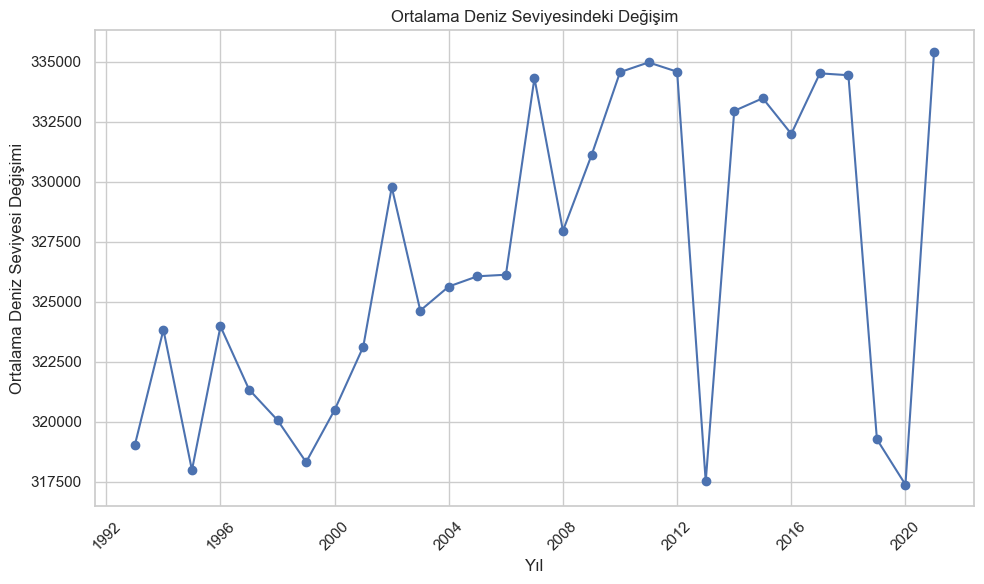

In [181]:
plt.figure(figsize=(10, 6))
plt.plot(average_sea_level_by_year.index, average_sea_level_by_year.values, marker='o')
plt.title('Ortalama Deniz Seviyesindeki Değişim')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Deniz Seviyesi Değişimi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [182]:
datas_folder = "Datas"
weather_data = pd.read_csv(f"{datas_folder}/weather.csv")



In [183]:
# Tarih sütununu datetime formatına çevirin
weather_data['Date.Full'] = pd.to_datetime(weather_data['Date.Full'])

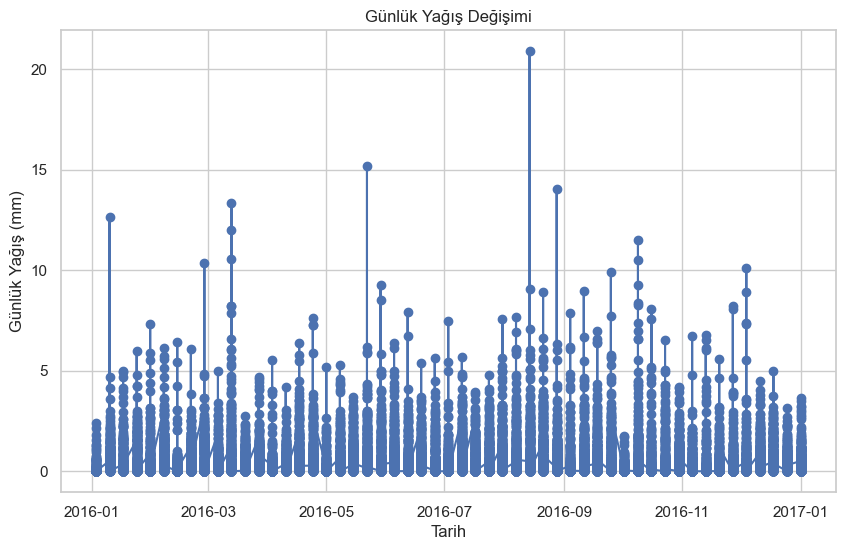

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Date.Full'], weather_data['Data.Precipitation'], marker='o')
plt.title('Günlük Yağış Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Günlük Yağış (mm)')
plt.grid(True)
plt.show()

In [185]:

# Dosya yolunu belirtin
datas_folder = "Datas"
data_path = os.path.join(datas_folder, "AirQuality.csv")

In [186]:
# Veriyi okuyun
veri_df = pd.read_csv(data_path, delimiter=';')

In [187]:
veri_df.head(30)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [188]:
# Tarih ve CO(GT) sütunlarını datetime formatına çevirin
veri_df['Date'] = pd.to_datetime(veri_df['Date'] + ' ' + veri_df['Time'], format='%d/%m/%Y %H.%M.%S')
veri_df['CO(GT)'] = veri_df['CO(GT)'].str.replace(',', '.').astype(float)  # Virgül yerine nokta kullanıldığından emin olun


In [189]:
veri_df.Date.describe()

count                   9357
mean     2004-09-21 16:00:00
min      2004-03-10 18:00:00
25%      2004-06-16 05:00:00
50%      2004-09-21 16:00:00
75%      2004-12-28 03:00:00
max      2005-04-04 14:00:00
Name: Date, dtype: object

In [190]:
veri_df.Time.describe()

count         9357
unique          24
top       18.00.00
freq           390
Name: Time, dtype: object

In [191]:
veri_df.shape

(9471, 17)

In [192]:
# 3D scatter plot oluşturun
fig = px.scatter_3d(veri_df,
                    x='Date',
                    y='CO(GT)',
                    z='CO(GT)',
                    color='CO(GT)',
                    hover_name='Date',
                    color_continuous_scale='Viridis',
                    title='Hava Kalitesi CO(GT) Değişimi - 3D Harita',
                    template='plotly_dark')

# Harita görselleştirmelerini özelleştirin
fig.update_layout(
    scene=dict(xaxis_title='Tarih', yaxis_title='CO(GT)', zaxis_title='CO(GT)'),
    margin=dict(l=0, r=0, b=0, t=40),
    coloraxis_colorbar=dict(title="CO(GT)"),
    paper_bgcolor='black',
    scene_bgcolor='black'
)

# Markerları özelleştirin
fig.update_traces(marker=dict(size=5, symbol='circle', opacity=0.8))

# Haritayı gösterin
fig.show()

In [193]:
datas_folder = "Datas"
climate_data_path = os.path.join(datas_folder, "GlobalTemperatures.csv")
climate_data = pd.read_csv(climate_data_path)


In [194]:
datas_folder = "Datas"
statistics_data_path = os.path.join(datas_folder, "world-data-2023.csv")


In [195]:
# Veriyi yükleyin
statistics_data = pd.read_csv(statistics_data_path)

In [196]:
# Veri önizlemesi
print(statistics_data.head())

       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...   